In [1]:
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [2]:
pcd_stat_files = glob.glob('../tmp/stat20200517/*.json')
pcd_stats = []
for filepath in pcd_stat_files:
    with open(filepath, 'r') as f:
        stat_data = json.load(f)
        productId = stat_data['productNo']['value']
        year = int(productId.split('-')[0])
        productClass = productId.split('-')[1]
        productSection = productClass[0]
        pcd_stat = {
            'id': productId,
            'year': year,
            'class': productClass,
            'section': productSection,
            'point_num': stat_data['shape']['value'][0],
        }
        metrics = stat_data['metrics']['value']
        flatten_metrics = {}
        for k, v in metrics.items():
            for m in ['mean', 'median', 'max', 'min', 'var']:
                merged_key = '{}_{}'.format(k,m)
                flatten_metrics[merged_key] = v[m]
        pcd_stat.update(flatten_metrics)
        pcd_stats.append(pcd_stat)
df_pcd_stats = pd.DataFrame(pcd_stats)
df_pcd_stats

,id,year,class,section,point_num,distance_mean,distance_median,distance_max,distance_min,distance_var,...,g_mean,g_median,g_max,g_min,g_var,b_mean,b_median,b_max,b_min,b_var
0,30-I8399-01-35-10,30,I8399,I,4652500,0.030216,0.019723,5.308138,0.0,0.001424,...,0.106119,0.090196,1.000000,0.003922,0.004502,0.106119,0.090196,1.000000,0.003922,0.004502
1,30-I8399-01-47-03,30,I8399,I,4855353,0.028825,0.021378,4.192901,0.0,0.001015,...,0.138110,0.090196,1.000000,0.000000,0.018777,0.138110,0.090196,1.000000,0.000000,0.018777
2,30-I8399-01-18-03,30,I8399,I,4999995,0.046084,0.023558,14.224359,0.0,0.006411,...,0.306720,0.305878,0.999985,0.000000,0.024773,0.326243,0.325485,0.999985,0.000000,0.034230
3,31-T2136-03-11-03,31,T2136,T,16547537,0.034306,0.035228,4.338752,0.0,0.000615,...,0.513397,0.537247,0.999985,0.000000,0.040964,0.411194,0.419601,0.999985,0.000000,0.039685
4,30-I8399-01-02-23,30,I8399,I,4565777,0.026752,0.016763,2.904638,0.0,0.001145,...,0.139402,0.101961,1.000000,0.003922,0.016327,0.139402,0.101961,1.000000,0.003922,0.016327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,30-I8399-01-23-09,30,I8399,I,4835371,0.028370,0.019698,5.611812,0.0,0.001362,...,0.147262,0.105882,1.000000,0.000000,0.012000,0.147262,0.105882,1.000000,0.000000,0.012000
1339,30-I8399-01-11-05,30,I8399,I,4794040,0.029067,0.020809,8.743262,0.0,0.001369,...,0.132749,0.090196,1.000000,0.000000,0.013383,0.132749,0.090196,1.000000,0.000000,0.013383
1340,29-C2001-01-13-57,29,C2001,C,11326842,0.066774,0.051517,16.240909,0.0,0.008368,...,0.283376,0.238281,0.996094,0.000000,0.051339,0.275915,0.230469,0.996094,0.000000,0.053619
1341,30-I8399-01-22-20,30,I8399,I,4550856,0.030446,0.019313,10.767765,0.0,0.002856,...,0.167021,0.129412,1.000000,0.000000,0.012365,0.167021,0.129412,1.000000,0.000000,0.012365


In [3]:
df_pcd_stats['x_length'] = df_pcd_stats['x_max'] - df_pcd_stats['x_min']
df_pcd_stats['y_length'] = df_pcd_stats['y_max'] - df_pcd_stats['y_min']
df_pcd_stats['z_length'] = df_pcd_stats['z_max'] - df_pcd_stats['z_min']
df_pcd_stats['xy_length'] = df_pcd_stats.apply(lambda x: max(x['x_length'], x['y_length']), axis=1)
df_pcd_stats['xy_ratio'] = df_pcd_stats['y_length'] / df_pcd_stats['x_length']
df_pcd_stats['yx_ratio'] = df_pcd_stats['x_length'] / df_pcd_stats['y_length']
df_pcd_stats['aspect_ratio'] = df_pcd_stats.apply(lambda x: max(x['xy_ratio'], x['yx_ratio']), axis=1)

In [4]:
df_pcd_stats.groupby('section').count()['id']

section
C      62
D       5
I    1053
K      60
N       1
R      59
T       2
W       3
X      98
Name: id, dtype: int64

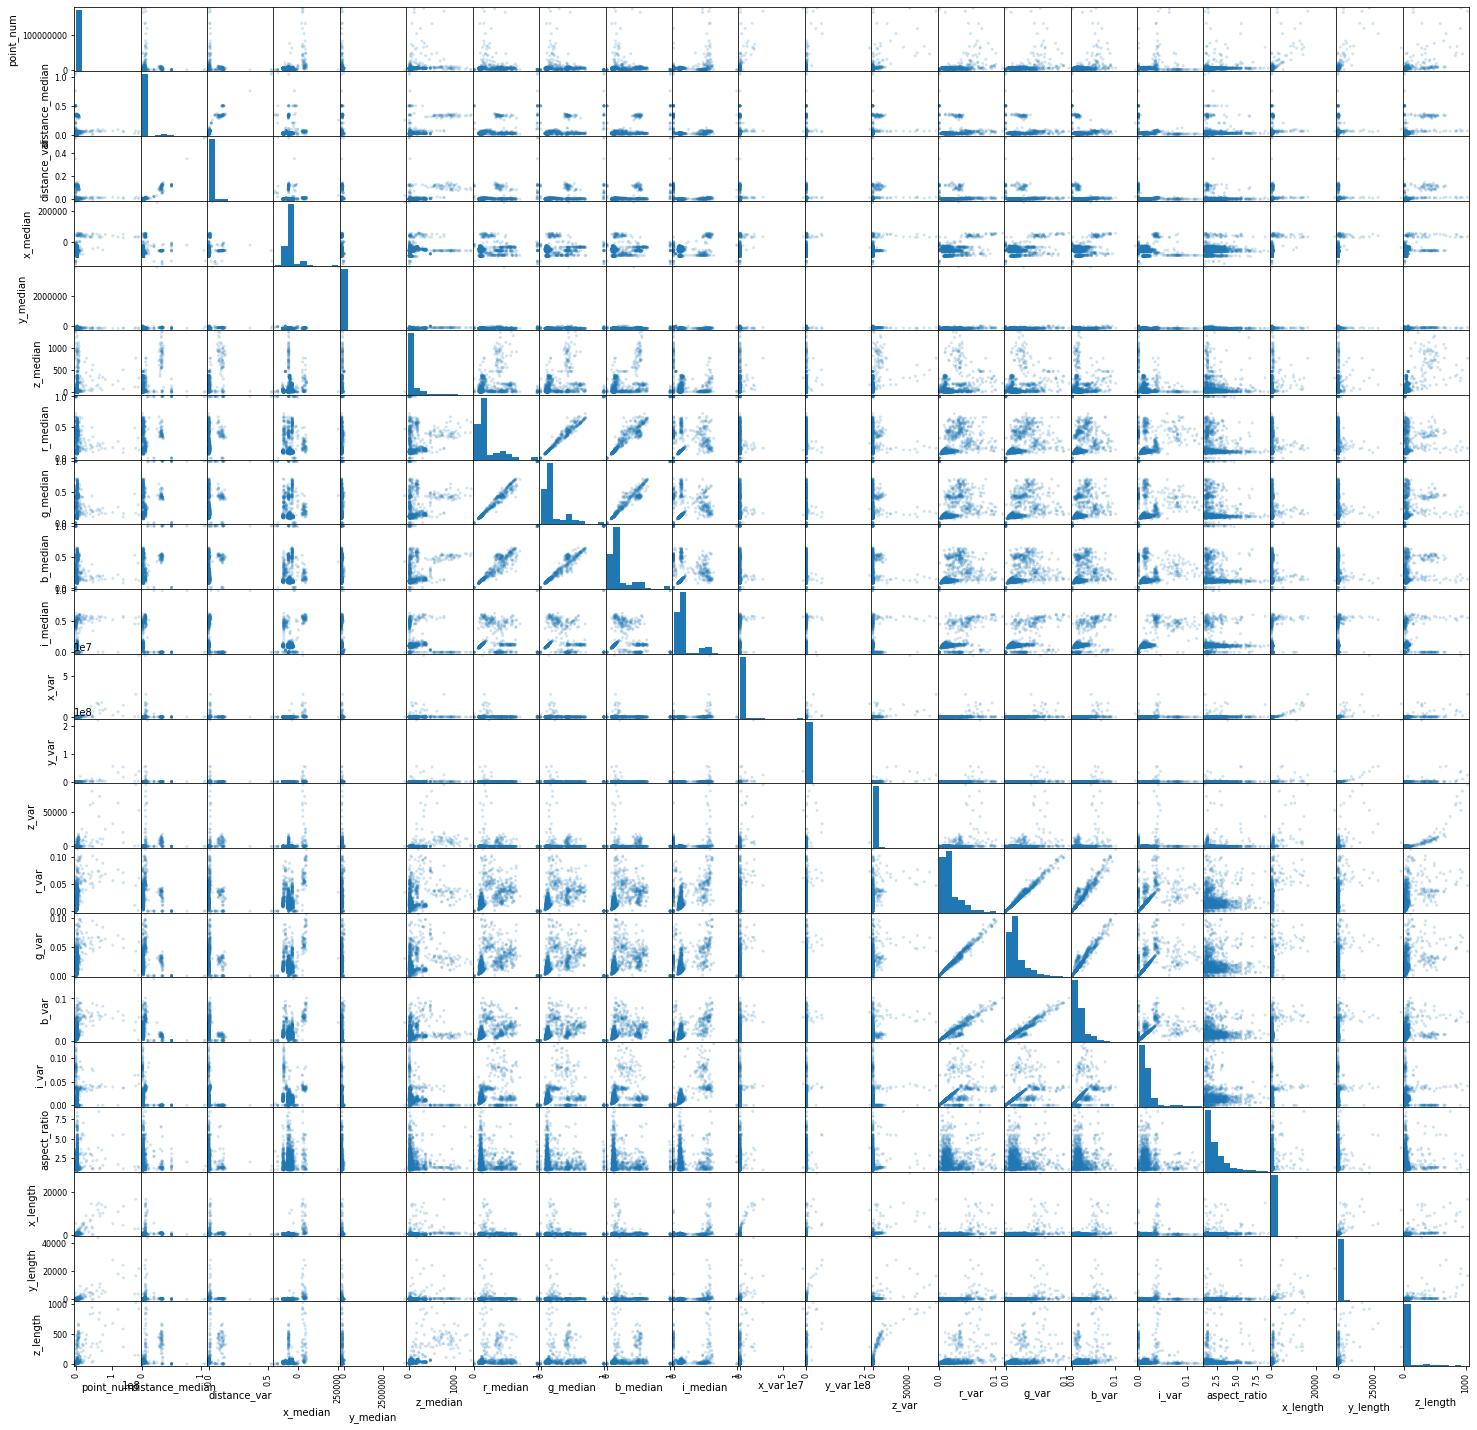

In [5]:
target_colums = [
    'point_num',
    'distance_median',
    'distance_var',
    'x_median',
    'y_median',
    'z_median',
    'r_median',
    'g_median',
    'b_median',
    'i_median',
    'x_var',
    'y_var',
    'z_var',
    'r_var',
    'g_var',
    'b_var',
    'i_var',
    'aspect_ratio',
    'x_length',
    'y_length',
    'z_length',
]
rcParams['figure.figsize'] = 25, 25
pd.plotting.scatter_matrix(df_pcd_stats[target_colums], alpha=0.2)
plt.savefig("scatter_matrix.png", format="png",dpi=900)

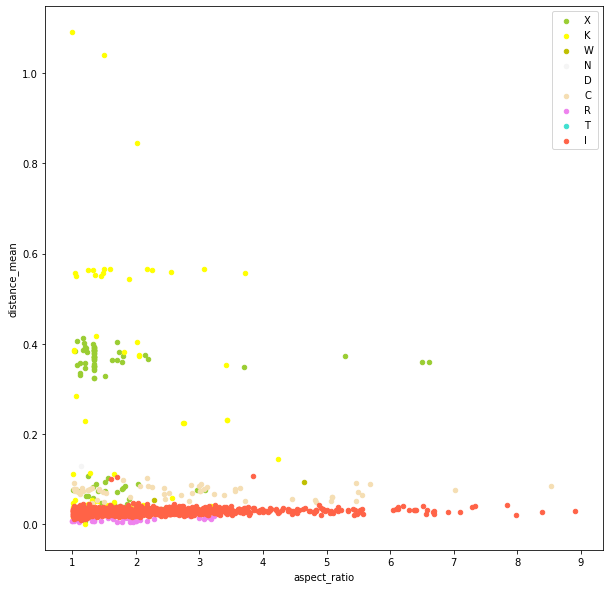

In [9]:
rcParams['figure.figsize'] = 10, 10
import matplotlib
label_colors = list(matplotlib.colors.cnames.keys()) + ["r", "g", "b", "c", "m", "y"]
label_colors = sorted(label_colors)[::-1]
ax = None
for i, section in enumerate(set(df_pcd_stats['section'])):
    target_df = df_pcd_stats[df_pcd_stats['section']==section]
    ax = target_df.plot(kind='scatter',
                        x='aspect_ratio',
                        y='distance_mean',
                        c=label_colors[i],
                        ax=ax,
                        label=section)
ax.legend()

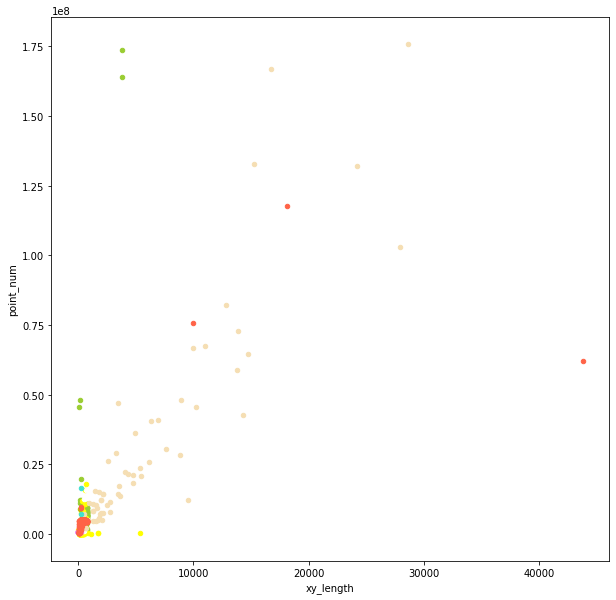

In [7]:
ax = None
for i, section in enumerate(set(df_pcd_stats['section'])):
    target_df = df_pcd_stats[df_pcd_stats['section']==section]
    ax = target_df.plot(kind='scatter',
                      x='xy_length',
                      y='point_num',
                      c=label_colors[i],
                      ax=ax,
                      legend=True)

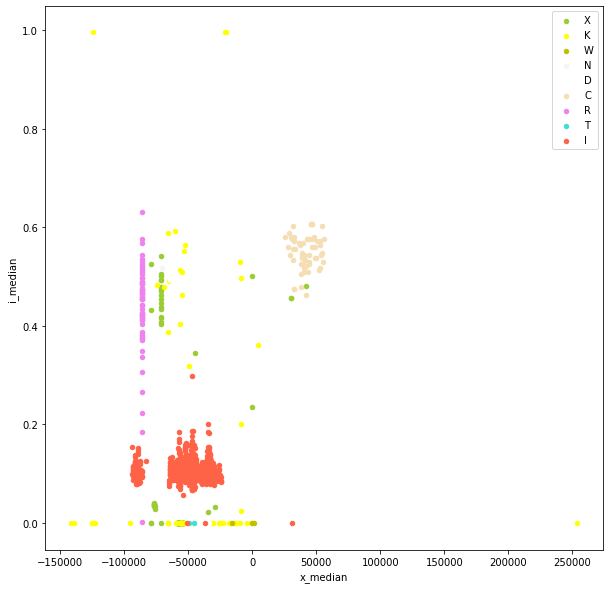

In [8]:
ax = None
for i, section in enumerate(set(df_pcd_stats['section'])):
    target_df = df_pcd_stats[df_pcd_stats['section']==section]
    ax = target_df.plot(kind='scatter',
                      x='x_median',
                      y='i_median',
                      c=label_colors[i],
                      ax=ax,
                      label=section)
ax.legend()